In [26]:
import glob
import pandas as pd

In [27]:
#####################################
#Read one stand alone scan of the data (scan 0), plot it, and list x/y data points

In [28]:
# Read table into pandas
query1 = pd.read_table('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA/bat13_x19z00y03_2.xy', header=None).loc[6:8197]

# Strip Text and Expand into two columns
query2 = query1[0].str.strip().str.split(' ',expand=True).set_index(0)
#set data type
query2[1] = query2[1].astype(int)

In [29]:
# print x y data
query2.head(3)

,1
0,
1,0
2,10
3,15


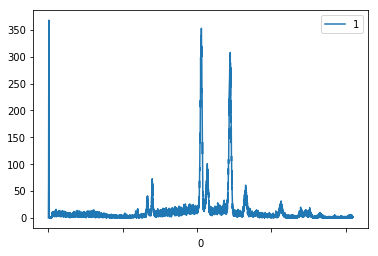

In [30]:
#plot x y data
query2.plot()

In [ ]:
###################
# New Section
#######################

# List Data Definitions

In [31]:

query2a = pd.read_table('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA/bat13_x19z00y03_2.xy', header=None)

In [32]:
#First line of file - Data Defintions needed. 
line1 = query2a[0:1]
line1

,0
0,#COMMAND: motor_cam bat13_x19z00y03_2 yr 3.5 3...


In [33]:
#Second line of file  - Data defintions needed. 
line2 = query2a[1:2]
line2

,0
1,# sl1r sl1l sl1t sl1b sl2r sl2l sl2t sl2b sl3r...


In [34]:
#Third line of file - Data defintions needed - Do these represent energy levels of certain particles?
line3 = query2a[2:3]
line3

,0
2,# 2 2 0.03 0 1 1 5 5.01 10 10 0.1 0.1 4 4 0.4 ...


In [35]:
#Fourth line of file - Appears to be scan count and time/date
line4 = query2a[3:4]
line4

,0
3,#Scan 0 Fri Jul 24 02:49:35 2015


In [36]:
#Fifth line of file - Need data definitions.
line5 = query2a[4:5]
line5

,0
4,"#At end of scan, counts: 0.983718 7957 1298 0"


In [39]:
# Extract xr yr zr data - Need data defintions
query2b = query2a[5:6]
query2c = query2b[0].str.split('=',expand=True)
query2c

,0,1
5,#xr yr zr,19 3.5 0


In [38]:
#XY Data
query2.head()

,1
0,
1,0
2,10
3,15
4,18
5,51


In [2]:
##############################################

#New Section

##############################################

#Combine All Files


# using glob function, create a list of all the files in the directory of the laboratory research results
all_files = glob.glob('C:\\Users\Jesse\Documents\FILES\BATTERY_DATA_ANALYSIS\DATA\*.xy')

In [3]:
#using the "all_files" glob function from above, iterate over the files and append them to a list named "data_processor"
data_processor = []
for file in all_files:
    data_read = pd.read_table(file,header=None)
    data_processor.append(data_read)
    
data = pd.concat(data_processor)

In [20]:
#display the first 3 rows of the data
data.head(3)

,0
0,#COMMAND: motor_cam bat13_x19z00y03_10 yr 3.5 ...
1,# sl1r sl1l sl1t sl1b sl2r sl2l sl2t sl2b sl3r...
2,# 2 2 0.03 0 1 1 5 5.01 10 10 0.1 0.1 4 4 0.4 ...


In [21]:
#display the last 3 rows of the data
data.tail(3)

,0
122925,8190 2
122926,8191 0
122927,8192 1


In [6]:
#display general info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17660081 entries, 0 to 122927
Data columns (total 1 columns):
0    object
dtypes: object(1)
memory usage: 269.5+ MB
